# PyLASCA
a tool for ...

## Transform
Transfrom coordinates based upon user defined landmarks 

by

Sebastian Malkusch

2020-06-08

Institute for clinical pharmacology,

data science division,

Goethe-University Frankfurt,

Germany

malkusch@med.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

## Load Libraries

In [1]:
import cv2 as cv
import pandas as pd
from pyLASCA.source import fileNames
from pyLASCA.source import transformator

fn_landmarks = fileNames.FileNames()
fn_data = fileNames.FileNames()
fn_img = fileNames.FileNames()
fn_pxl = fileNames.FileNames()
fn_out = fileNames.FileNames()
tf = transformator.Transformator()

## Define File Names
##### Define Metadata

In [2]:
mainFolder = "/Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung"
outFolder = "/Users/malkusch/PowerFolders/LaSCA/mechanic"
probandNr = 8
day = 2
time = 15
deg = 90

probandId = str("SCTCAPS %s" %(str(probandNr).zfill(2))) 
subFolder = str("%s/Tag %i" % (probandId, day))
probandId_excel = str("sctcaps%s" %(str(probandNr).zfill(2)))

In [3]:
file_base = str("%s #%i %imin (Colour)_Landmarks" %(probandId, day, time))

fn_landmarks.fileName = mainFolder + "/" + subFolder + "/" + file_base + ".csv"
fn_landmarks.splitFileName()
print(fn_landmarks)

FileNames
fileName: /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 08/Tag 2/SCTCAPS 08 #2 15min (Colour)_Landmarks.csv
folderName: /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 08/Tag 2
baseName: SCTCAPS 08 #2 15min (Colour)_Landmarks
supplementaryInformation: 
dateString: 
suffix: csv
outFileName: 



###### Define data file names

In [4]:
fn_data.fileName = "/Users/malkusch/PowerFolders/LaSCA/mechanic/sctcaps_01-19_Datensatz.xlsx"
fn_data.splitFileName()
print(fn_data)

FileNames
fileName: /Users/malkusch/PowerFolders/LaSCA/mechanic/sctcaps_01-19_Datensatz.xlsx
folderName: /Users/malkusch/PowerFolders/LaSCA/mechanic
baseName: sctcaps_01-19_Datensatz
supplementaryInformation: 
dateString: 
suffix: xlsx
outFileName: 



###### Define image file name

In [5]:
img_base = str("%s #%i %imin (Colour)" %(probandId, day, time))

fn_img.fileName = mainFolder + "/" + subFolder + "/" + img_base + ".jpg"
fn_img.splitFileName()
print(fn_img)

FileNames
fileName: /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 08/Tag 2/SCTCAPS 08 #2 15min (Colour).jpg
folderName: /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 08/Tag 2
baseName: SCTCAPS 08 #2 15min (Colour)
supplementaryInformation: 
dateString: 
suffix: jpg
outFileName: 



###### Define pxl file name

In [6]:
fn_pxl.fileName = str("%s/pxl_size.xlsx" %(mainFolder))
fn_pxl.splitFileName()
print(fn_img)

FileNames
fileName: /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 08/Tag 2/SCTCAPS 08 #2 15min (Colour).jpg
folderName: /Users/malkusch/PowerFolders/LaSCA/Probanden Arm Bilder mit Markierung/SCTCAPS 08/Tag 2
baseName: SCTCAPS 08 #2 15min (Colour)
supplementaryInformation: 
dateString: 
suffix: jpg
outFileName: 



## Import pxl size

In [7]:
df_pxl = pd.read_excel(fn_pxl.fileName)
pxlSize = df_pxl[(df_pxl["object_id"] == probandNr) & (df_pxl["measurement"] == str("%i.%i" %(day,time)))]["pxlSize_mm"].values[0]
print(pxlSize)

0.24805438371239916


## Transformation

        x_pxl       y_pxl       x_mm       y_mm  alpha
0  354.061224  340.013605  87.826439  84.341865      0
1  400.258706  303.746269  99.285927  75.345593     90
2  321.333333  294.344086  79.708142  73.013341    180
3  352.966667  257.083333  87.554929  63.770648    270
Affine transfromation matrix:
[[ 9.96924137e-01 -7.83725986e-02  8.85938591e+01]
 [ 7.83725986e-02  9.96924137e-01  7.41178619e+01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


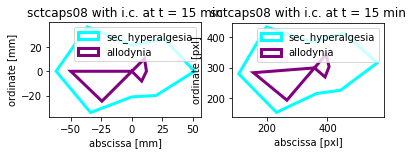

In [8]:
tf.time = time
tf.pxlSize = pxlSize
tf.importLandmarks(fileName = fn_landmarks.fileName)
tf.identifyLandmarkType()
tf.importRawData(fileName = fn_data.fileName, sheetName = probandId_excel)
#tf.rotateRawData(deg=deg)
tf.rotateLandmarks(deg = deg)
tf.transform()
print("Affine transfromation matrix:")
print(tf.affineMatrix)
tf.plotTimePoint()

## Graphical result exploration

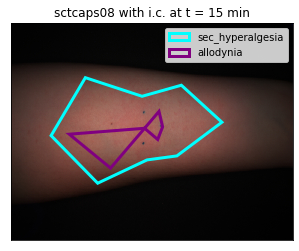

In [9]:
flip = 0

raw_img = cv.imread(fn_img.fileName, cv.IMREAD_COLOR)
if(flip):
    flip_img = cv.flip(raw_img, 0)
else:
    flip_img = raw_img
rgb_img = cv.cvtColor(flip_img, cv.COLOR_BGR2RGB)
tf.plotTimePointOnImage(img = rgb_img)

## Save results

In [10]:
fn_out.baseName = fn_img.baseName
fn_out.folderName = outFolder + "/" + subFolder
fn_out.updateDateString()


fn_out.supplementalInformation = str("transformed")
fn_out.suffix = "csv"
fn_out.mergeFileName()
tf.saveTransformationResults(fileName = fn_out.outFileName)

fn_out.supplementalInformation = str("matrix")
fn_out.mergeFileName()
tf.saveAffineMatrix(fileName = fn_out.outFileName)

fn_out.supplementalInformation = str("transformed")
fn_out.suffix = "png"
fn_out.mergeFileName()
tf.saveContoursOnImage(img = raw_img, fileName = fn_out.outFileName)

Transformation results written to  /Users/malkusch/PowerFolders/LaSCA/mechanic/SCTCAPS 08/Tag 2/SCTCAPS 08 #2 15min (Colour)_transformed_200612.csv
Affine matrix written to  /Users/malkusch/PowerFolders/LaSCA/mechanic/SCTCAPS 08/Tag 2/SCTCAPS 08 #2 15min (Colour)_matrix_200612.csv
